# 🎥 Film DataPrep & Visualization

This project explores patterns in film production, budget, and box office success using a real-world movie dataset.  
Through Python, pandas, and Plotly, we clean, analyze, and visualize trends to uncover industry insights—from the countries that dominate revenue to the rise and fall of movie releases over time.

---

**Key tools used:** `pandas`, `Plotly`, `os`, `seaborn`  
**Focus areas:** data cleaning, exploratory analysis, interactive/static visualizations  

In [1]:

#!pip install ploty
#!pip install seaborn
#!pip install matplotlip


In [2]:
# importing the packages we will use in this project
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt  
import plotly as px  
import os

# first collecting the data 

In [3]:
# read in the data
df=pd.read_csv(r"D:\salma\analyst\archive\movies.csv") 

In [4]:

df
# looking at the whole data

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [5]:
print(df.info()) # looking at the data info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB
None


# cleaning the data 

In [6]:
null_counts = df.isnull().sum()
print(null_counts)
# We need to see if we have any missing data

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64


In [7]:
print(df[['votes', 'budget', 'gross', 'runtime','score','star','country','company','released','writer','rating']].isnull().sum()) 
# focusing only on the missing values the data


votes          3
budget      2171
gross        189
runtime        4
score          3
star           1
country        3
company       17
released       2
writer         3
rating        77
dtype: int64


In [8]:
df['votes'] = df['votes'].fillna(0).astype('int64')
df['budget'] = df['budget'].fillna(0).astype('int64')
df['gross'] = df['gross'].fillna(0).astype('int64')
df['runtime'] = df['runtime'].fillna(0).astype('int64')
df['score '] = df['score'].fillna(0).astype('int64')
# clean and convert the int64 type data 



In [9]:
df['rating'] = df['rating'].fillna('Unknown')
df['writer'] = df['writer'].fillna('Unknown')
df['star '] = df['star'].fillna('Unknown')
df['country'] = df['country'].fillna('Unknown')
df['company'] = df['company'].fillna('Unknown')
df['released'] = df['released'].fillna('Unknown')
# clean and convert the float64 type data 

In [10]:
df['score'] = df['score'].replace('', 0)
df['star'] = df['star'].replace('', 'Unknown')

In [11]:
print(df['score'].isnull().sum())
print(df['star'].isnull().sum())
# still having some missing values in 'score' and 'star'

3
1


In [12]:
df['score'] = df['score'].copy() 
df['star'] = df['star'].copy() 

In [13]:
df['star'] = df['star'].apply(lambda x: 'Unknown' if pd.isnull(x) or x == '' else x)
df['score'] = df['score'].apply(lambda x: (0) if pd.isnull(x) or x == '' else x)
# with this there is no missing values and the data is all clean 

# Using descriptive statistics 


In [14]:
print(df.describe()) 


              year        score         votes        budget         gross  \
count  7668.000000  7668.000000  7.668000e+03  7.668000e+03  7.668000e+03   
mean   2000.405451     6.387911  8.807403e+04  2.551350e+07  7.656567e+07   
std      11.153508     0.976862  1.633011e+05  3.858954e+07  1.641217e+08   
min    1980.000000     0.000000  0.000000e+00  0.000000e+00  0.000000e+00   
25%    1991.000000     5.800000  9.100000e+03  0.000000e+00  3.860582e+06   
50%    2000.000000     6.500000  3.300000e+04  1.200000e+07  1.895543e+07   
75%    2010.000000     7.100000  9.300000e+04  3.200000e+07  7.262022e+07   
max    2020.000000     9.300000  2.400000e+06  3.560000e+08  2.847246e+09   

           runtime       score   
count  7668.000000  7668.000000  
mean    107.205660     5.940402  
std      18.737179     1.022492  
min       0.000000     0.000000  
25%      95.000000     5.000000  
50%     104.000000     6.000000  
75%     116.000000     7.000000  
max     366.000000     9.000000  


In [15]:

df['year_extracted'] = df['released'].str.extract(r'(\d{4})')

In [16]:
df['year_extracted'] = df['year_extracted'].fillna(df['year'])

In [17]:
pd.set_option('display.max_rows',None)

In [18]:
pd.set_option('display.max_rows', 20)  # Limits row display
pd.set_option('display.max_columns', None)  # Shows all columns

In [ ]:
from IPython.display import display, HTML

# Sort the DataFrame
df_sorted = df.sort_values(by='gross', ascending=False)

# Function to display a scrollable table
def scrollable_df(df, max_height=300):
    style = f"""
    <style>
        .scrollable {{
            display: block;
            max-height: {max_height}px;
            overflow-y: auto;
            border: 1px solid #ccc;
        }}
    </style>
    """
    display(HTML(style))
    display(HTML(df.to_html(classes='scrollable', index=False)))

# Use the function to display the sorted DataFrame to see the whole data efficiently 
scrollable_df(df_sorted)

# starting visualizing the data 

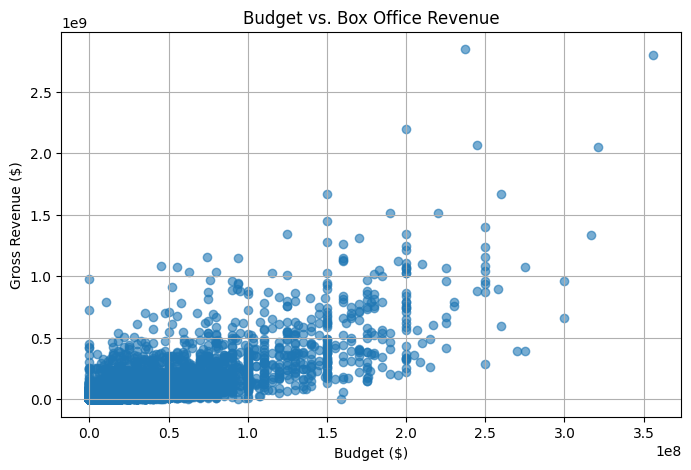

In [20]:
# starting visualizing the data 
plt.figure(figsize=(8,5))
plt.scatter(df['budget'], df['gross'], alpha=0.6)
plt.xlabel("Budget ($)")
plt.ylabel("Gross Revenue ($)")
plt.title("Budget vs. Box Office Revenue")
plt.grid()
plt.show()


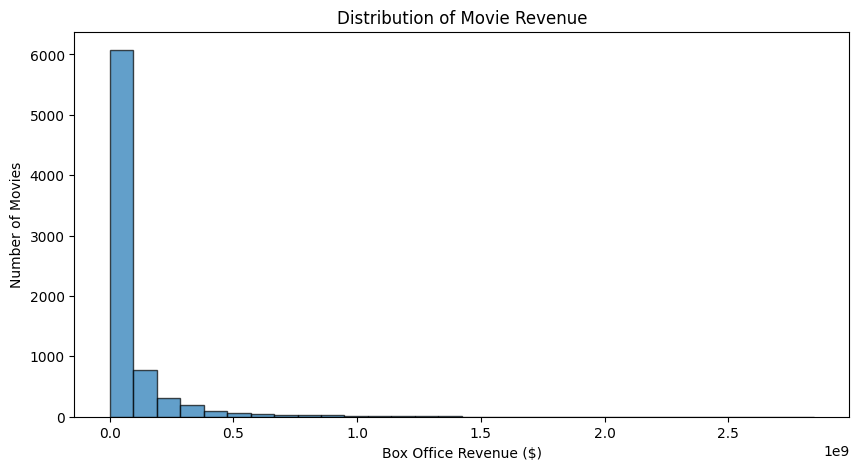

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.hist(df['gross'], bins=30, edgecolor='black', alpha=0.7)
plt.xlabel("Box Office Revenue ($)")
plt.ylabel("Number of Movies")
plt.title("Distribution of Movie Revenue")

plt.show()

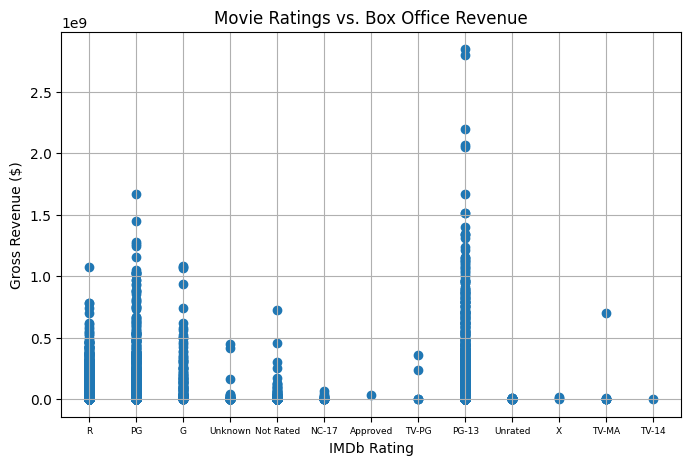

In [22]:
from matplotlib.axes import Axes
from matplotlib.axis import Axis
from matplotlib.pyplot import axes


plt.figure(figsize=(8, 5))
plt.scatter(df['rating'], df['gross'], alpha=1)
plt.xlabel("IMDb Rating")
plt.ylabel("Gross Revenue ($)")
plt.tick_params(axis='x', labelsize=6.5)  # Make y-axis ticks smaller
plt.title("Movie Ratings vs. Box Office Revenue")
plt.grid()
plt.show()

In [23]:
top_countries = df.groupby('country')['gross'].sum().nlargest(5)



In [24]:
import plotly.express as px
import pandas as pd

# Group movies by country and sum gross revenue
top_countries = df.groupby('country', as_index=False)['gross'].sum().nlargest(5, 'gross')

# Create interactive bar chart
fig = px.bar(
    top_countries, x='gross', y='country', 
    text='gross',  # Display gross revenue on hover
    title="Top 5 Countries by Box Office Success",
    labels={'gross': 'Box Office Revenue ($)', 'country': 'Country'},
    hover_data={'gross': ':,.0f'}  # Format hover values with commas
)

fig.update_traces(textposition="outside")  # Moves labels outside bars
fig.show()

In [25]:
import plotly.express as px
import pandas as pd

# Group movies by country and sum gross revenue
top_countries = df.groupby('country', as_index=False)['gross'].sum().nlargest(5, 'gross')

# Create interactive bar chart
fig = px.bar(
    top_countries, x='gross', y='country',
    text='gross',
    title="Top 5 Countries by Box Office Success",
    labels={'gross': 'Box Office Revenue ($)', 'country': 'Country'},
    hover_data={'gross': ':,.0f'}
)

fig.update_traces(textposition="outside")

import os

# Ensure the 'images' directory exists
os.makedirs("images", exist_ok=True)

# Save the chart as a static PNG image (no need for fig.show())
fig.write_image("images/top_5_countries_gross.png")

![Top 5 Countries by Box Office Success](images/top_5_countries_gross.png)

In [26]:
movies_per_year = df.groupby('year_extracted').size().reset_index(name='count')

In [27]:
movies_per_year['year_extracted'] = movies_per_year['year_extracted'].astype(int)

In [28]:
movies_per_year = movies_per_year.sort_values(by='year_extracted')

In [29]:
movies_per_year['year_extracted'] = pd.to_datetime(movies_per_year['year_extracted'], format='%Y').dt.year

In [30]:
import plotly.express as px


fig = px.bar(
    movies_per_year, x='year_extracted', y='count', 
    title="Number of Movies Released Per Year",
    labels={'year_extracted': 'Year', 'count': 'Number of Movies'},
    text_auto=True  # Shows numbers on bars
)

fig.update_traces(marker_color='lightblue')  # Customize bar color
fig.show()


In [31]:
import plotly.express as px
import os

# Create the bar chart
fig = px.bar(
    movies_per_year, x='year_extracted', y='count', 
    title="Number of Movies Released Per Year",
    labels={'year_extracted': 'Year', 'count': 'Number of Movies'},
    text_auto=True
)

fig.update_traces(marker_color='lightblue')

# Ensure the 'images' folder exists
os.makedirs("images", exist_ok=True)

# Save the figure as a PNG image
fig.write_image("images/movies_per_year.png")

![Number of Movies Released Per Year](images/movies_per_year.png)

In [32]:
df.groupby(['company', 'year'])[["gross"]].sum()

,,gross
company,year,
"""DIA"" Productions GmbH & Co. KG",2003,44350926
"""Weathering With You"" Film Partners",2019,193457467
.406 Production,1996,10580
1+2 Seisaku Iinkai,2000,1196218
10 West Studios,2010,814906
...,...,...
i am OTHER,2015,17986781
i5 Films,2001,10031529
iDeal Partners Film Fund,2013,506303


In [33]:
import plotly.express as px

# Aggregate data
df_grouped = df.groupby(['company', 'year'])[['gross']].sum().reset_index()

# Plot
fig = px.line(df_grouped, x="year", y="gross", color="company", 
              title="Company Revenue Trends Over Time")

fig.show()

In [34]:
import plotly.express as px
import os

# Aggregate data
df_grouped = df.groupby(['company', 'year'])[['gross']].sum().reset_index()

# Create the line chart
fig = px.line(
    df_grouped, x="year", y="gross", color="company", 
    title="Company Revenue Trends Over Time"
)

# Optional: Customize colors, axes, or layout here if you'd like

# Ensure the 'images' folder exists
os.makedirs("images", exist_ok=True)

# Save the figure as a static image
fig.write_image("images/company_revenue_trends.png")

![Company Revenue Trends Over Time](images/company_revenue_trends.png)

In [35]:
top_companies = df_grouped.groupby("company")[["gross"]].sum().nlargest(10, "gross").index

In [36]:
df_top10 = df_grouped[df_grouped["company"].isin(top_companies)]

In [37]:
import plotly.express as px

fig = px.line(df_top10, x="year", y="gross", color="company", 
              title="Top 10 Companies' Revenue Trends Over Time")

fig.show()

In [38]:
import plotly.express as px
import os

# Create the line chart
fig = px.line(
    df_top10, x="year", y="gross", color="company",
    title="Top 10 Companies' Revenue Trends Over Time"
)

# Ensure the 'images' folder exists
os.makedirs("images", exist_ok=True)

# Save the figure as a PNG file
fig.write_image("images/top10_companies_revenue_trends.png")

![Top 10 Companies' Revenue Trends Over Time](images/top10_companies_revenue_trends.png)

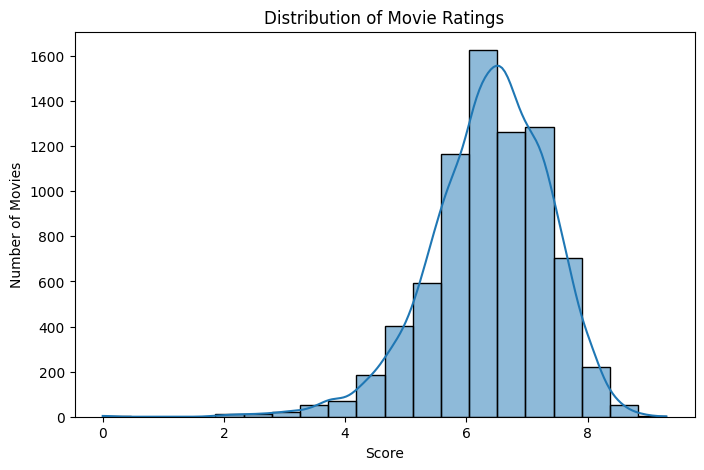

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df['score'], bins=20, kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Score')
plt.ylabel('Number of Movies')
plt.show()

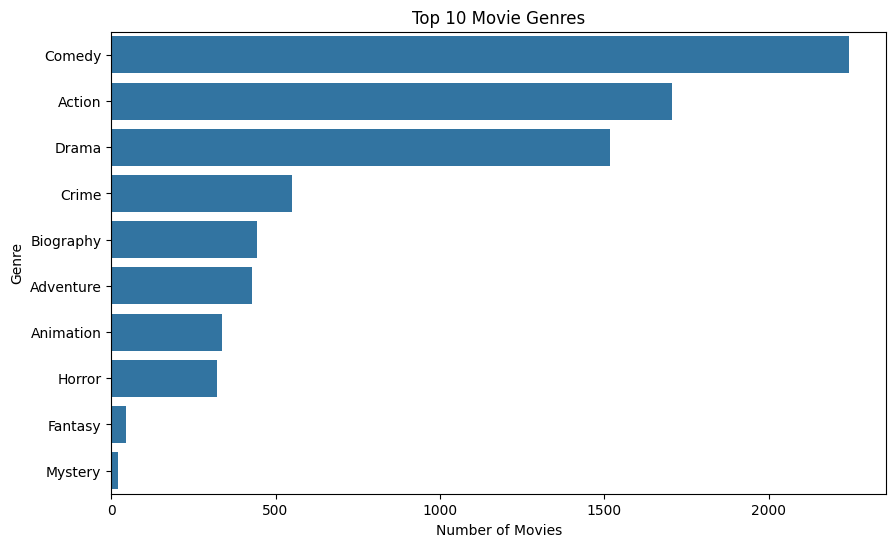

In [40]:
plt.figure(figsize=(10,6))
top_genres = df['genre'].value_counts().head(10)
sns.barplot(x=top_genres.values, y=top_genres.index)
plt.title('Top 10 Movie Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()

In [41]:
import plotly.express as px

fig = px.scatter(df, x='budget', y='gross', color='genre',
                 hover_data=['name', 'year_extracted'],
                 title='Budget vs Gross Revenue (Interactive)')
fig.show()

In [42]:
import plotly.express as px
import os

# Create the scatter plot
fig = px.scatter(
    df, x='budget', y='gross', color='genre',
    hover_data=['name', 'year_extracted'],
    title='Budget vs Gross Revenue (Interactive)'
)

# Ensure the 'images' folder exists
os.makedirs("images", exist_ok=True)

# Save the figure as a PNG
fig.write_image("images/budget_vs_gross_scatter.png")

![Budget vs Gross Revenue (Interactive)](images/budget_vs_gross_scatter.png)

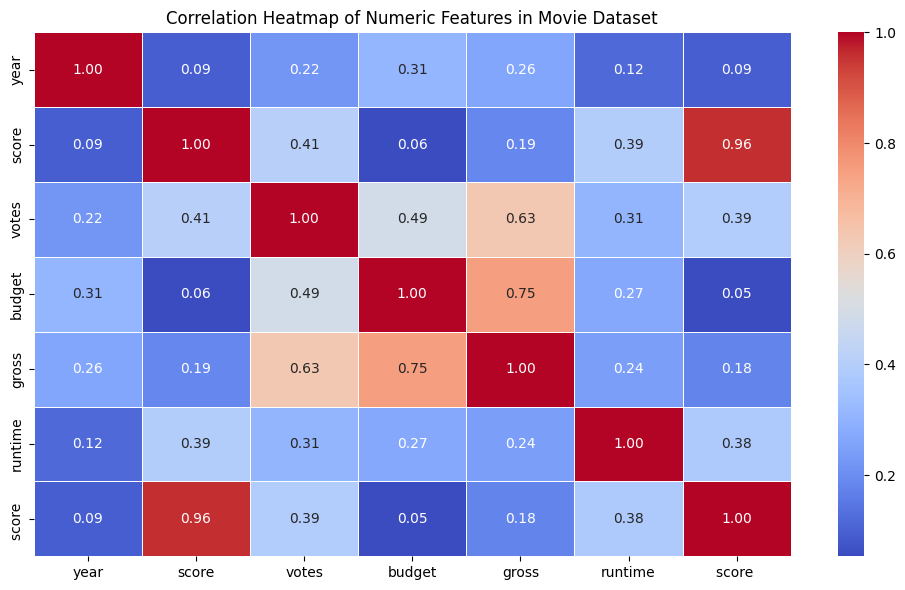

In [43]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include='number')

# Generate the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features in Movie Dataset")
plt.tight_layout()
plt.show()


> 💡 Powered by curiosity and caffeine.  
> Built with a passion for data and clean visuals.